Housing data:
median income is scaled down and capped at 15.0001 for higher median incomes and 0.5 at lower median incomes.
Similarly,Housing median age and median house value(capped at 50,000) were capped in the original data. 


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pandas.plotting import scatter_matrix

In [2]:
import os
import urllib.request
import tarfile
from typing import List,Optional,Any,Union

In [3]:
import sklearn.model_selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import  Pipeline


In [4]:
folder_path=os.path.join("datasets","housing_data")
file_path=os.path.join(folder_path,"housing.tgz")
url_path="https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.tgz"

In [5]:
def download_data(url_path,folder_path,file_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    urllib.request.urlretrieve(url_path,file_path)
    
    with tarfile.open(file_path,"r") as tar:
        for file_name in tar.getnames():
            print(f"filenames in the zip file are {file_name}")
        tar.extractall(folder_path)

In [6]:
download_data(url_path=url_path,folder_path=folder_path,file_path=file_path)

filenames in the zip file are housing.csv


C:\Users\saiye\AppData\Local\Temp\ipykernel_44772\2736403656.py:9: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(folder_path)


In [7]:
def read_data(folder_path,file_name):
    housing_data=os.path.join(folder_path,file_name)
    read_data=pd.read_csv(housing_data)
    return read_data

In [15]:
housing_data=read_data(folder_path=folder_path,file_name="housing.csv")

In [16]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
class DataExplorer():
    def __init__(self,dataframe:pd.DataFrame):
        self.df=dataframe
        self.numeric_df=self.df.select_dtypes(include=["number"])
        self.categorical_df=self.df.select_dtypes(include=["object","category"])

    def summary_data(self):
        print("======TOP 5 rows =======")
        display( self.df.head())
        
        print("\n=== Shape of the data=======")
        display( self.df.shape)

        print("\n===Overview of feature's null values and datatype ========")
        display(self.df.info())

        print("\n==== descriptive statistics=======")
        display(self.df.describe())
        
    def plot_histograms(self,bins=50,figsize=(20,10),save_fig=True):
        "histograms of the features"
        plt.figure(figsize=(12,8))
        self.df.hist(bins=bins,figsize=figsize)
        plt.suptitle("Histograms of features",fontname="Times New Roman",fontweight='bold',
                fontsize=16)
        if save_fig:
            plt.savefig("Histograms of features")
            print("Histogram of features has been saved")
        plt.show()
        
    def pairplot(self,features=None,x_vars=None,y_vars=None,save_fig=True):
        "Visualizes the correlation scatter matrix among the features "
       
        if features is None:
            features=self.df.columns.tolist()
        plt.figure(figsize=(12,8))
        g=sns.pairplot(self.df[features],x_vars=x_vars,y_vars=y_vars)
        g.fig.suptitle("Pairplot among the features",fontname="Times New Roman",fontweight='bold',
                fontsize=16)
        g.fig.tight_layout()
        plt.show()
        if save_fig:
            g.fig.savefig("scatter matrix",dpi=300,bbox_inches="tight")
            print("Pairplot saved as 'scatter matrix.png'.")
            

    def correlation_matrix(self,save_fig=True):
        "Viusalizes the linear correlationality among the features"
        self.corr_mat=self.df.corr(numeric_only=True)
        plt.figure(figsize=(12,8))
        g=sns.heatmap(self.corr_mat,cmap="coolwarm",vmin=-1,vmax=1)
        plt.suptitle("Correlation matrix",fontname="Times New Roman",fontweight='bold',
                fontsize=16)
        plt.tight_layout()
        plt.show()
        if save_fig:
            plt.savefig("correlation_matrix",dpi=300,bbox_inches="tight")
            print("Correlation matrix saved as correlation matrix")
        
    def missing_values_summary(self):
        missing_counts=self.df.isnull().sum(axis=0)
        total_rows=len(self.df)
        missing_info=pd.DataFrame({
            "missing_count":missing_counts,
            "total_count":total_rows,
            "missing_percentage":(missing_counts/total_rows)*100
        })
        print("\n======MISSING VALUES SUMMARY=========")
        display(missing_info[missing_info["missing_count"]>0])

    def categorical_summary(self):
        print("\n======Categorical features summary===========")
        if hasattr(self,"categorical_df"):
            if self.categorical_df.empty:
                print("There are no categorial features in the dataframe.")
            else:
                for col in self.categorical_df.columns:
                    print(f"======categorical feature: {col}=========")
                    display(self.categorical_df[col].value_counts())  
        else:
            print(f"{self.__class__.__name__} doesnt have the attribute 'categorical_df'")
            



======TOP 5 rows =======


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



=== Shape of the data=======


(20640, 10)


===Overview of feature's null values and datatype ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None


==== descriptive statistics=======


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Histogram of features has been saved


<Figure size 1200x800 with 0 Axes>

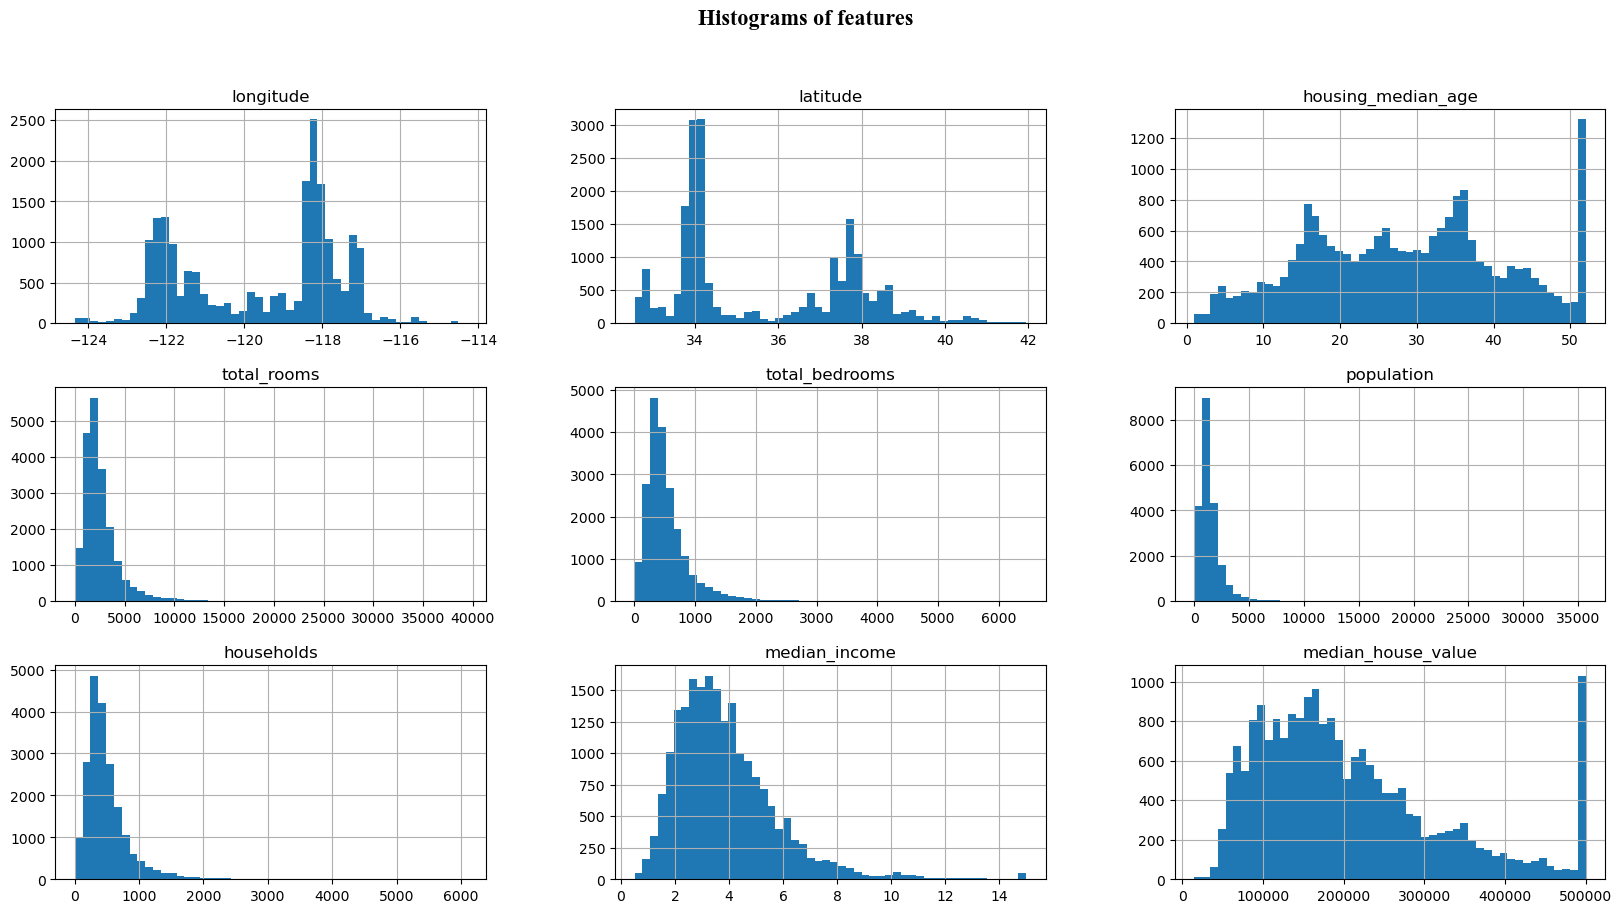

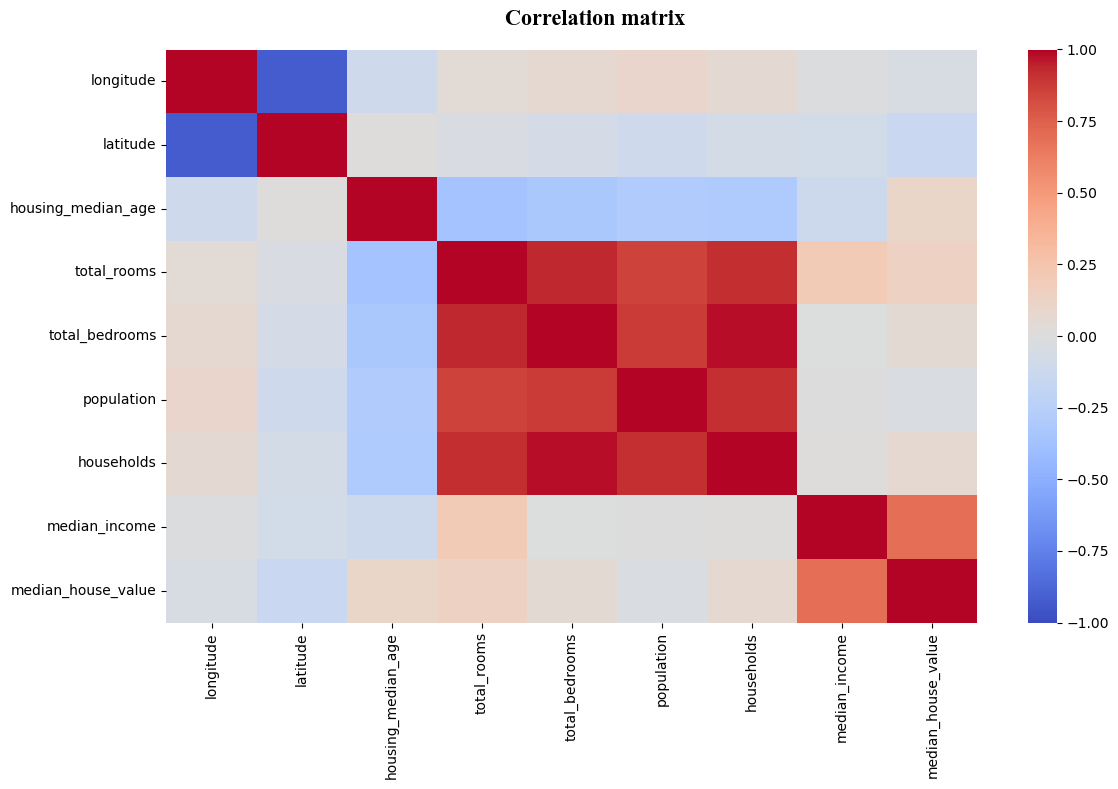

Correlation matrix saved as correlation matrix

======MISSING VALUES SUMMARY=========


,missing_count,total_count,missing_percentage
total_bedrooms,207,20640,1.002907



======Categorical features summary===========
======categorical feature: ocean_proximity=========


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

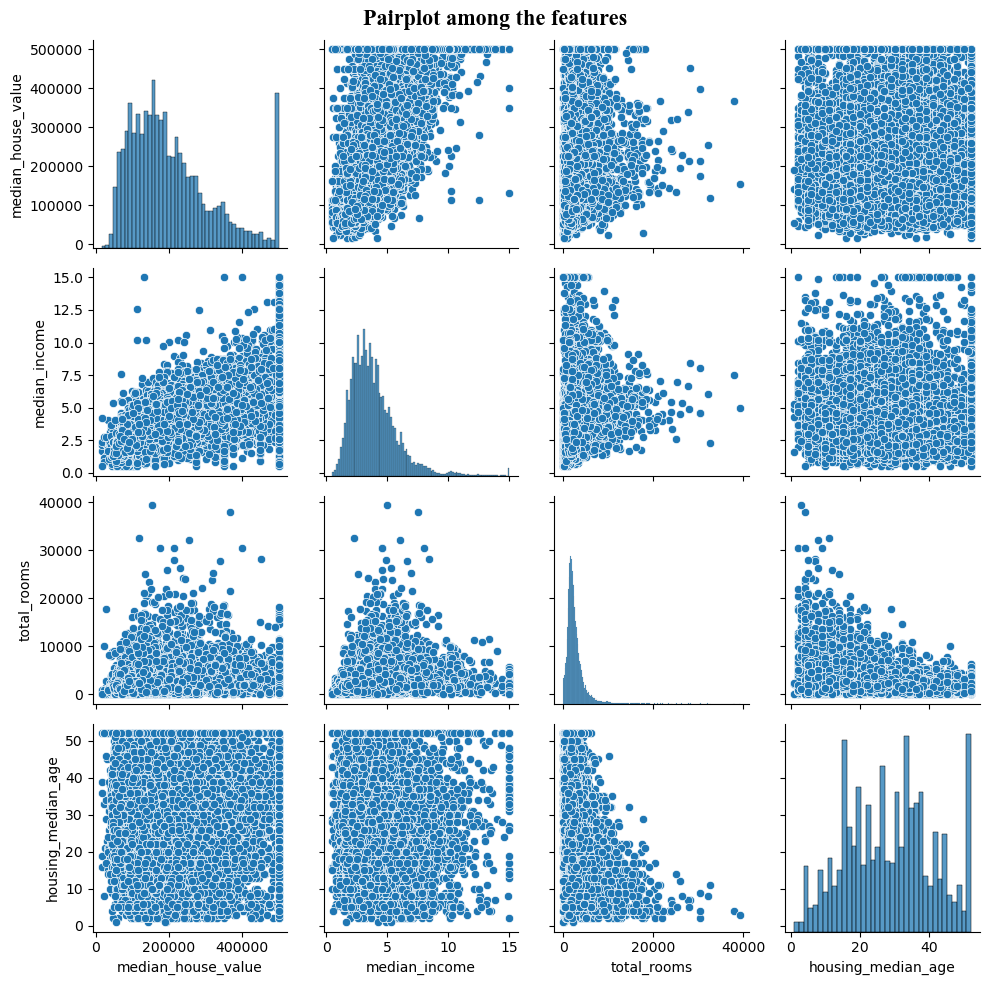

Pairplot saved as 'scatter matrix.png'.


In [40]:
        
explorer = DataExplorer(housing_data)
explorer.summary_data()      
explorer.plot_histograms()    
explorer.correlation_matrix(save_fig=True) 
explorer.corr_mat["median_house_value"].sort_values(ascending=False)
explorer.missing_values_summary()  
explorer.categorical_summary()
explorer.pairplot(features=["median_house_value","median_income","total_rooms","housing_median_age"])



Notice that the total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. 

In [12]:
class Preprocessing():
    def __init__(self,dataframe:pd.DataFrame):
        self.df=dataframe
    
    def seperate_numeric_categorical(self):
        self.numeric_df=self.df.select_dtypes(include=["number"])
        self.categorical_df=self.df.select_dtypes(include=["object","category"])
        return self.numeric_df,self.categorical_df
        
    def simple_imputer(self,columns:Union[List[str],str]=None,
                       strategy:str="median",
                       fill_value=None):
        if columns is None:
            columns=self.df.columns
        elif isinstance(columns,str):
            columns=[columns]
        imputer=SimpleImputer(strategy=strategy,
                              fill_value=fill_value)
        self.imputed_data=imputer.fit_transform(self.df[columns])
        self.df[columns]=self.imputed_data
        return self.df
   
    def split_train_test_data(self,dataframe=None,test_ratio=0.2,random_state=42):
        "Split into train and test data "
        if dataframe is None:
            dataframe=self.df
        np.random.seed(random_state)
        indices=np.random.permutation(len(dataframe))
        random_data=self.df.iloc[indices]
        test_length=int(len(dataframe)*test_ratio)
        test_data=random_data[:test_length]
        train_data=random_data[test_length:]
        return train_data,test_data
    
    def convert_discrete_feature(self,continuous_feature:str,
                                 bins:list,
                                 labels:list,
                                 show_dirscete_hist=True):
        "Converts into discrete continous distribution from continuously distributed features"
        self.df["discrete_cat"]=pd.cut(
                                        self.df[continuous_feature],
                                        bins=bins,
                                        labels=labels)
        if show_dirscete_hist:
            self.df["discrete_cat"].hist()
            plt.title("Histogram for discrete data")
        return self.df
   
   
    def stratified_split(self,preserve_feature,
                         test_ratio=0.2,random_state=42):
        "Splits into train and test data by preserving categories in the preserve feature "
        stratified_train_data,stratified_test_data=pd.DataFrame(),pd.DataFrame()
        
        for each_cat in self.df[preserve_feature].unique():
            cat_data=self.df[self.df[preserve_feature]==each_cat]
            cat_train_data,cat_test_data=self.split_train_test_data(cat_data,test_ratio=test_ratio,random_state=random_state)
            stratified_train_data=pd.concat([stratified_train_data,cat_train_data])
            stratified_test_data=pd.concat([stratified_test_data,cat_test_data])
        return stratified_train_data,stratified_test_data
   
    def encode(self,
               categorical_features:Union[List[str],str]=None,
               with_strategy="OneHotEncoding"):

        if categorical_features is None:
            categorical_features=self.categorical_df.tolist()
        elif isinstance(categorical_features,str):
            categorical_features=[categorical_features]
        
        if with_strategy=="OneHotEncoding":
            
            cat_encoder=OneHotEncoder()
            hot_encoder_arr=cat_encoder.fit_transform(self.categorical_df[categorical_features].values.reshape(-1,1)).toarray()
            cat_df=pd.DataFrame(hot_encoder_arr,columns=cat_encoder.get_feature_names_out(),
                               index=self.df.index)
            
            # drop the origional categories features from the dataframe
            self.df.drop(columns=categorical_features,inplace=True)
            
            # concatenate the encoded features to the dataframe
            self.df=pd.concat([self.df,cat_df],axis=1)
            
            return self.df
            
    def drop_features(self,drop_feature,
                dataframes:Union[List[pd.DataFrame],pd.DataFrame]=None):
        dropped_dfs=[]
        "Drop the feature(s) from dataframe(s)"
        # If dataframes is not provided, use the instance's dataframes
        if dataframes is None:
            dataframes = self.df

        if isinstance(dataframes, pd.DataFrame):
            dataframes = [dataframes]
        
        # dropping the feature (i.e, income category) from the dataframes
        for idx,df in enumerate(dataframes):
            if drop_feature in df.columns:
                # Drop the feature and append the modified DataFrame to the list
                modified_df = df.drop(drop_feature, axis=1)
                dropped_dfs.append(modified_df)
        
        # Return a single DataFrame if only one was processed
        if len(dropped_dfs) == 1:
            return dropped_dfs[0]
            
        return dropped_dfs


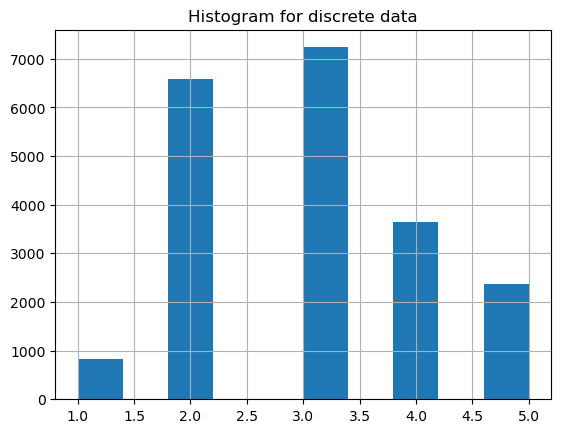

In [13]:

preprocessor=Preprocessing(housing_data)

#Seperating data into numeric and categorical datatypes
numeric_df,categorical_df=preprocessor.seperate_numeric_categorical()

# Impututation the nan values:
preprocessor.simple_imputer(columns=numeric_df.columns.tolist(),strategy="median",fill_value=None)

#creating a income category based on the median income, as it is important to have equal proportion in the training data as the collected data
df_with_income_cat=preprocessor.convert_discrete_feature(continuous_feature="median_income",bins=[0,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

# Encoding the categorical variables with one hot encoder
encoded_data=preprocessor.encode(categorical_features="ocean_proximity",with_strategy="OneHotEncoding")
# Splitting the data into train and test data based on the proportionality of income category
strat_train,strat_test=preprocessor.stratified_split(preserve_feature="discrete_cat",test_ratio=0.2,random_state=42)

df_with_income_cat["discrete_cat"].value_counts()/len(df_with_income_cat)

train_data,test_data=preprocessor.drop_features(drop_feature="discrete_cat",dataframes=[strat_train,strat_test])


In [14]:
y_test_act=test_data["median_house_value"]

In [15]:
y_train=train_data["median_house_value"]
X_train,X_test=preprocessor.drop_features(drop_feature="median_house_value",
                dataframes=[train_data,test_data])



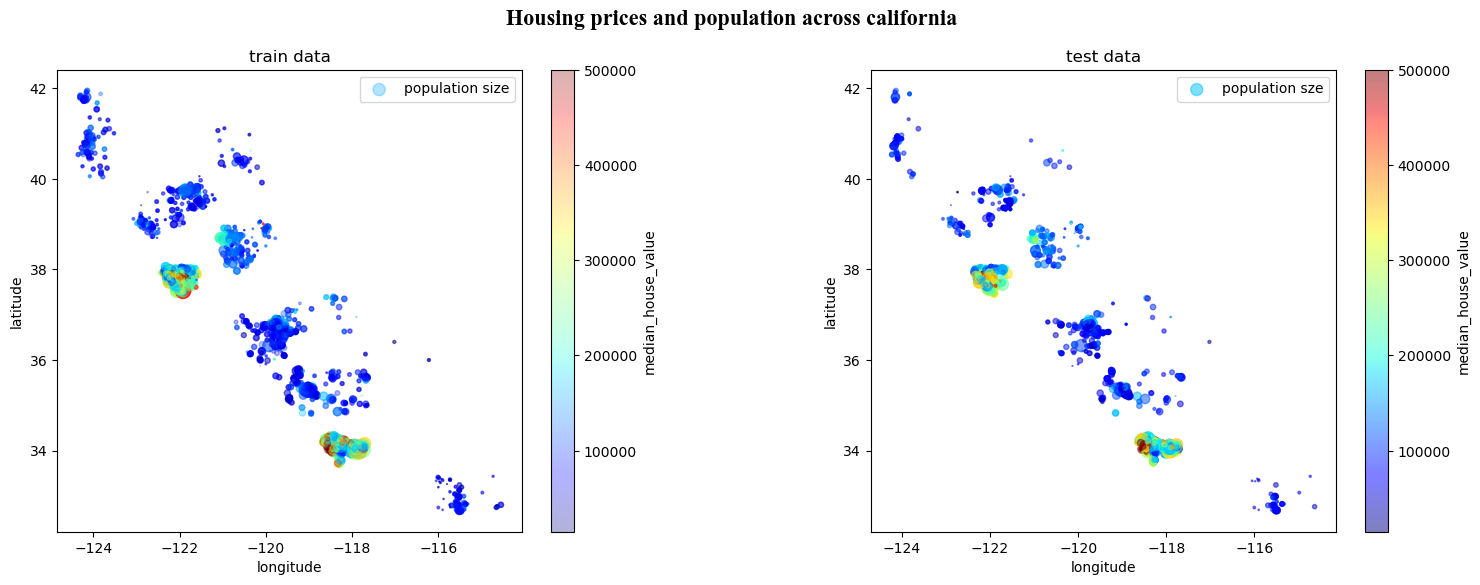

In [16]:
def geographical_visualization(train_data,test_data,save_fig=True):
    fig,axis=plt.subplots(1,2,figsize=(18,6))
    
    for index in range(len(axis)):
        axis[index].set(xlabel="longitude",ylabel="latitude")
    
    train_data.plot(x="longitude",y="latitude",kind="scatter",ax=axis[0],
                         title="train data",alpha=0.3,c="median_house_value",
                         cmap="jet",s=train_data["population"]/100,
                         label="population size")
    test_data.plot(x="longitude",y="latitude",kind="scatter",ax=axis[1],
                       title="test data",alpha=0.5,c="median_house_value",
                         cmap="jet",s=test_data["population"]/100,
                        label="population sze") 
    fig.suptitle("Housing prices and population across california",fontname="Times New Roman",fontweight='bold',
                fontsize=16)
    
    plt.legend()

    # Adjust layout to accommodate the super title
    plt.subplots_adjust(top=0.88, wspace=0.4)

    if save_fig:
        fig.savefig("housing prices and population of california")

    plt.show()
geographical_visualization(train_data,test_data,save_fig=True)




From visual inspection of the data, It can be inferred that majority of the population resides at the bay area,probably resulting in high housing prices.


Since other features of nan-bedrooms rows does contribute significantly to median house value,
we replace the nan with median of the columns.

The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms.

The number of rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.

In [17]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=False, population_per_household=False, rooms_per_household=False):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.population_per_household = population_per_household
        self.rooms_per_household = rooms_per_household

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        new_X = X.copy()

        if self.rooms_per_household:
            new_X["rooms_per_household"] = new_X["total_rooms"] / new_X["households"]
        
        if self.population_per_household:
            new_X["population_per_household"] = new_X["population"] / new_X["households"]
        
        if self.add_bedrooms_per_room:
            new_X["bedrooms_per_room"] = new_X["total_bedrooms"] / new_X["total_rooms"] 

        return new_X

In [18]:
est=CombinedAttributesAdder(add_bedrooms_per_room=True, population_per_household=True, rooms_per_household=True)
train_data=est.fit_transform(strat_train_data)

NameError: name 'strat_train_data' is not defined